# Mariam Ammar Data Science US Job Market Salary Predictions 

## Data Cleaning & EDA 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("kaggle.csv",low_memory=False)

df = pd.DataFrame()


In [2]:
#Filter out responses from students and those who are not employed. 
data = data[data["Q3"] == "United States of America"]
data = data[data["Q5"] != "Student"]
data = data[data["Q5"] != "Currently not employed"]
data = data[data["Q25"].notnull()]

### Q1 - Age Feature

(array([493.,   0.,   0., 572.,   0.,   0., 398.,   0.,   0., 382.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

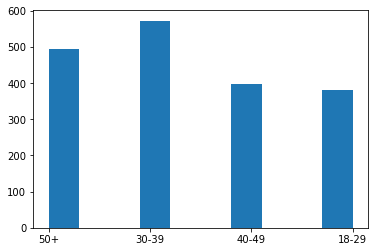

In [3]:
data["Q1"].replace("18-21", "18-29", inplace = True)
data["Q1"].replace("22-24", "18-29", inplace = True)
data["Q1"].replace("25-29", "18-29", inplace = True)

data["Q1"].replace("30-34", "30-39", inplace = True)
data["Q1"].replace("35-39", "30-39", inplace = True)

data["Q1"].replace("40-44", "40-49", inplace = True)
data["Q1"].replace("45-49", "40-49", inplace = True)


data["Q1"].replace("50-54", "50+", inplace = True)
data["Q1"].replace("55-59", "50+", inplace = True)
data["Q1"].replace("60-69", "50+", inplace = True)
data["Q1"].replace("70+", "50+", inplace = True)



#Create new, clean dataset with encoded features
cdf = pd.DataFrame()

scale_mapper = {"18-29":0, "30-39":1, "40-49":2, "50+":3}
cdf["Q1_age"] = data["Q1"].replace(scale_mapper)
cdf["Q1_age"].value_counts()

plt.hist(data["Q1"])

### Q2 - Gender 

(array([1401.,    0.,    0.,    0.,    0.,  386.,    0.,    0.,    0.,
          58.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

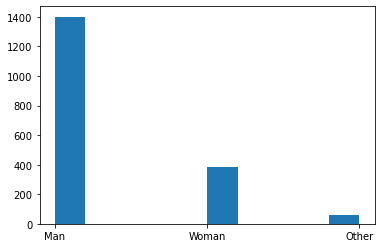

In [4]:
data["Q2"].replace("Prefer not to say", "Other", inplace = True)
data["Q2"].replace("Nonbinary", "Other", inplace = True)
data["Q2"].replace("Prefer to self-describe", "Other", inplace = True)



cdf = cdf.join(pd.get_dummies(data["Q2"], prefix = "gender_"))


plt.hist(data["Q2"])

### Q4 - Level of Education

(array([913.,   0.,   0., 440.,   0.,   0., 383.,   0.,   0., 109.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

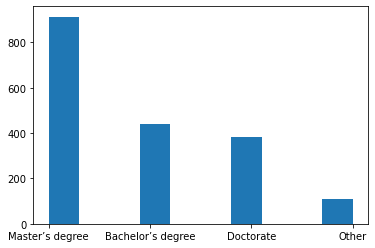

In [5]:
data["Q4"].replace("Professional doctorate", "Doctorate", inplace = True)
data["Q4"].replace("Doctoral degree", "Doctorate", inplace = True)
data["Q4"].replace("Some college/university study without earning a bachelor’s degree", "Other", inplace = True)
data["Q4"].replace("I prefer not to answer", "Other", inplace = True)
data["Q4"].replace("No formal education past high school", "Other", inplace = True)

scale_mapper = {"Other":0, "Bachelor’s degree":1, "Master’s degree":2, "Doctorate":3}
cdf["Q4_edu"] = data["Q4"].replace(scale_mapper)
cdf["Q4_edu"].value_counts()

data["Q4"].value_counts()

plt.hist(data["Q4"])

### Q5 - Title

In [6]:
data["Q5"].replace("Developer Relations/Advocacy", "Other", inplace = True)

cdf = cdf.join(pd.get_dummies(data["Q5"], prefix = "title_"))


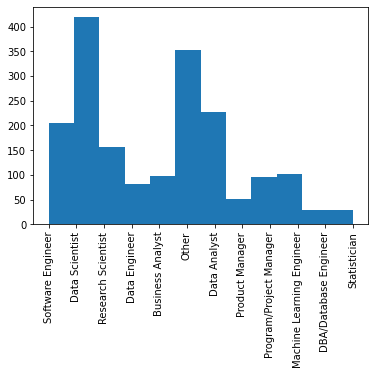

In [7]:

plt.xticks(rotation='vertical')
plt.hist(data["Q5"], bins = 12)
plt.show()

In [8]:
data["Q5"].value_counts()


Data Scientist               419
Other                        353
Data Analyst                 227
Software Engineer            204
Research Scientist           156
Machine Learning Engineer    102
Business Analyst              97
Program/Project Manager       96
Data Engineer                 81
Product Manager               52
DBA/Database Engineer         29
Statistician                  29
Name: Q5, dtype: int64

### Q6 - Coding Experience

In [9]:
data["Q6"].replace("< 1 years", "<1 year", inplace = True)
data["Q6"].replace("I have never written code", "<1 year", inplace = True)
data["Q6"].replace("1-3 years", "1-5 years", inplace = True)
data["Q6"].replace("3-5 years", "1-5 years", inplace = True)

scale_mapper = {"<1 year":0, "1-5 years":1, "5-10 years":2, "10-20 years":3, "20+ years":4}
cdf["Q6_coding_exp"] = data["Q6"].replace(scale_mapper)

data["Q6"].value_counts()

1-5 years      514
20+ years      395
5-10 years     346
10-20 years    308
<1 year        282
Name: Q6, dtype: int64

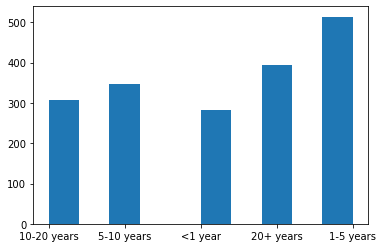

In [10]:
plt.hist(data["Q6"])
plt.show()

In [11]:
cdf["Q6_coding_exp"].value_counts()

1    514
4    395
2    346
3    308
0    282
Name: Q6_coding_exp, dtype: int64

### Q7 - Coding Languages

In [12]:
data['Q7_Part_1'].fillna(data['Q7_Part_2'], inplace = True)
data['Q7_Part_1'].fillna(data['Q7_Part_3'], inplace = True)
data['Q7_Part_1'].fillna(data['Q7_Part_4'], inplace = True)
data['Q7_Part_1'].fillna(data['Q7_Part_5'], inplace = True)
data['Q7_Part_1'].fillna(data['Q7_Part_6'], inplace = True)
data['Q7_Part_1'].fillna(data['Q7_Part_7'], inplace = True)
data['Q7_Part_1'].fillna(data['Q7_Part_8'], inplace = True)
data['Q7_Part_1'].fillna(data['Q7_Part_9'], inplace = True)
data['Q7_Part_1'].fillna(data['Q7_Part_10'], inplace = True)
data['Q7_Part_1'].fillna(data['Q7_Part_11'], inplace = True)
data['Q7_Part_1'].fillna(data['Q7_Part_12'], inplace = True)

In [13]:

data["Q7_Part_1"].value_counts()



Python        1431
SQL             97
R               94
None            47
Java             9
C                8
C++              6
Javascript       6
MATLAB           5
Bash             2
Julia            1
Name: Q7_Part_1, dtype: int64

In [14]:
for i in data["Q7_Part_1"]:
    if i == "Python" or i=="R" or i=="SQL":
        pass
    else:
        data["Q7_Part_1"].replace(i,"Other", inplace = True)
        
data["Q7_Part_1"].value_counts()

Python    1431
Other      223
SQL         97
R           94
Name: Q7_Part_1, dtype: int64

In [15]:

cdf = cdf.join(pd.get_dummies(data["Q7_Part_1"], prefix = "programming_lang_"))

### Q15 - ML Experience

In [16]:
data["Q15"].replace("Under 1 year", "<1 year", inplace = True)
data["Q15"].replace("I do not use machine learning methods", "<1 year", inplace = True)

data["Q15"].replace("1-2 years", "1-5 years", inplace = True)
data["Q15"].replace("2-3 years", "1-5 years", inplace = True)
data["Q15"].replace("3-4 years", "1-5 years", inplace = True)
data["Q15"].replace("4-5 years", "1-5 years", inplace = True)

data["Q15"].replace("20 or more years", "20+", inplace = True)


data["Q15"].value_counts()

1-5 years      735
<1 year        630
5-10 years     208
10-20 years     95
20+             59
Name: Q15, dtype: int64

In [17]:
scale_mapper = {"<1 year": 0, "1-5 years": 1, "5-10 years": 2, "10-20 years": 3, "20+": 4}
cdf["Q15_ml_experience"] = data["Q15"].replace(scale_mapper)

cdf["Q15_ml_experience"].fillna(0, inplace = True)

### Q20- Industry

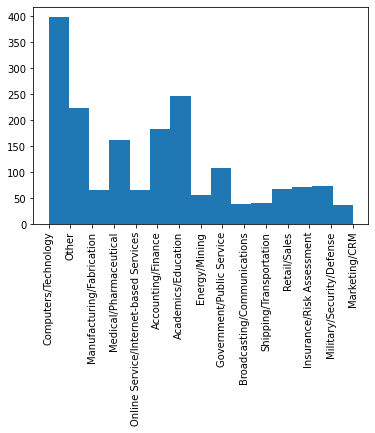

In [18]:
data["Q20"].replace("Hospitality/Entertainment/Sports", "Other", inplace = True)
data["Q20"].replace("Non-profit/Service", "Other", inplace = True)
data["Q20"].replace("Online Business/Internet-based Sales", "Other", inplace = True)


plt.xticks(rotation='vertical')
plt.hist(data["Q20"], bins = 15)
plt.show()

In [19]:
data["Q20"].value_counts()


Computers/Technology                      398
Academics/Education                       247
Other                                     224
Accounting/Finance                        183
Medical/Pharmaceutical                    162
Government/Public Service                 108
Military/Security/Defense                  73
Insurance/Risk Assessment                  72
Retail/Sales                               69
Online Service/Internet-based Services     67
Manufacturing/Fabrication                  67
Energy/Mining                              56
Shipping/Transportation                    42
Broadcasting/Communications                39
Marketing/CRM                              38
Name: Q20, dtype: int64

In [20]:
cdf = cdf.join(pd.get_dummies(data["Q20"], prefix = "industry_"))

### Q21 - Company Size 

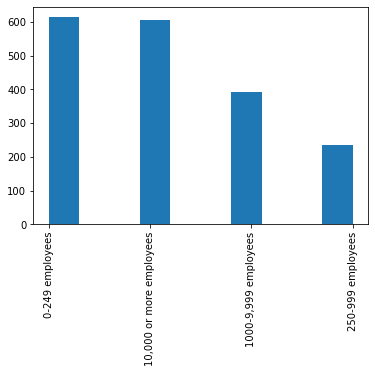

In [21]:
data["Q21"].replace("0-49 employees", "0-249 employees", inplace = True)
data["Q21"].replace("50-249 employees", "0-249 employees", inplace = True)


# data["Q21"].value_counts()
plt.xticks(rotation='vertical')
plt.hist(data["Q21"])
plt.show()

In [22]:
scale_mapper = {"0-249 employees":0, "250-999 employees":1, "1000-9,999 employees":2, "10,000 or more employees":3}
cdf["Q21_company_size"] = data["Q21"].replace(scale_mapper)

cdf["Q21_company_size"].value_counts()

0    613
3    605
2    392
1    235
Name: Q21_company_size, dtype: int64

### Q22 - Individuals Responsible for Data Science Workload

In [23]:
data["Q22"].replace("0", "0-4", inplace = True)
data["Q22"].replace("1-2", "0-4", inplace = True)
data["Q22"].replace("3-4", "0-4", inplace = True)

data["Q22"].replace("10-14", "10-19", inplace = True)
data["Q22"].replace("15-19", "10-19", inplace = True)

data["Q22"].value_counts()

0-4      790
20+      652
5-9      211
10-19    192
Name: Q22, dtype: int64

In [24]:
scale_mapper = {"0-4":0, "5-9":1, "10-19":2, "20+":3}
cdf["Q22_ind_responsible"] = data["Q22"].replace(scale_mapper)

cdf["Q22_ind_responsible"].value_counts()

0    790
3    652
1    211
2    192
Name: Q22_ind_responsible, dtype: int64

### Q24 - Important Responsibilities

In [25]:
data['Q24_Part_1'].fillna(data['Q24_Part_2'], inplace = True)
data['Q24_Part_1'].fillna(data['Q24_Part_3'], inplace = True)
data['Q24_Part_1'].fillna(data['Q24_Part_4'], inplace = True)
data['Q24_Part_1'].fillna(data['Q24_Part_5'], inplace = True)
data['Q24_Part_1'].fillna(data['Q24_Part_6'], inplace = True)
data['Q24_Part_1'].fillna(data['Q24_Part_7'], inplace = True)
data['Q24_Part_1'].fillna(data['Q24_OTHER'], inplace = True)


data['Q24_Part_1'].replace("Build and/or run a machine learning service that operationally improves my product or workflows","Other", inplace = True)
data['Q24_Part_1'].replace("Experimentation and iteration to improve existing ML models","ML experimentation and research", inplace = True)
data['Q24_Part_1'].replace("Do research that advances the state of the art of machine learning","ML experimentation and research", inplace = True)

data['Q24_Part_1'].replace("None of these activities are an important part of my role at work","Other", inplace = True)


data["Q24_Part_1"].value_counts()

Analyze and understand data to influence product or business decisions                                              1236
Other                                                                                                                338
Build prototypes to explore applying machine learning to new areas                                                   113
Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data     100
ML experimentation and research                                                                                       58
Name: Q24_Part_1, dtype: int64

In [26]:
cdf = cdf.join(pd.get_dummies(data["Q24_Part_1"], prefix = "responsibilities_"))

### Q27 - Cloud Computing Platforms Used

In [27]:
data['Q27_A_Part_1'].fillna(data['Q27_A_Part_2'], inplace = True)
data['Q27_A_Part_1'].fillna(data['Q27_A_Part_3'], inplace = True)
data['Q27_A_Part_1'].fillna(data['Q27_A_Part_4'], inplace = True)
data['Q27_A_Part_1'].fillna(data['Q27_A_Part_5'], inplace = True)
data['Q27_A_Part_1'].fillna(data['Q27_A_Part_6'], inplace = True)
data['Q27_A_Part_1'].fillna(data['Q27_A_Part_7'], inplace = True)
data['Q27_A_Part_1'].fillna(data['Q27_A_Part_8'], inplace = True)
data['Q27_A_Part_1'].fillna(data['Q27_A_Part_9'], inplace = True)
data['Q27_A_Part_1'].fillna(data['Q27_A_Part_10'], inplace = True)
data['Q27_A_Part_1'].fillna(data['Q27_A_Part_11'], inplace = True)
data['Q27_A_Part_1'].fillna(data['Q27_A_OTHER'], inplace = True)

data['Q27_A_Part_1'].replace(" IBM Cloud / Red Hat ", "Other", inplace = True)
data['Q27_A_Part_1'].replace(" Oracle Cloud ", "Other", inplace = True)
data['Q27_A_Part_1'].replace(" Salesforce Cloud ", "Other", inplace = True)
data['Q27_A_Part_1'].replace(" VMware Cloud ", "Other", inplace = True)
data['Q27_A_Part_1'].replace(" SAP Cloud ", "Other", inplace = True)
data['Q27_A_Part_1'].replace(" Alibaba Cloud ", "Other", inplace = True)



In [28]:
data['Q27_A_Part_1'].value_counts()

 Amazon Web Services (AWS)       630
None                             306
 Microsoft Azure                 177
 Google Cloud Platform (GCP)     114
Other                             79
Name: Q27_A_Part_1, dtype: int64

In [29]:
cdf = cdf.join(pd.get_dummies(data["Q27_A_Part_1"], prefix = "cloud_comp_"))


### Q32 - Big Data Tools Used Regularly 

In [30]:
for i in range(2,21):
    data['Q32_A_Part_1'].fillna(data[f'Q32_A_Part_{i}'], inplace = True)
    

data['Q32_A_Part_1'].replace("IBM Db2 ", "None/Other", inplace = True)
data['Q32_A_Part_1'].replace("None", "None/Other", inplace = True)
data['Q32_A_Part_1'].replace("Microsoft Azure Cosmos DB ", "None/Other", inplace = True)
data['Q32_A_Part_1'].replace("Amazon RDS ", "None/Other", inplace = True)
data['Q32_A_Part_1'].replace("Google Cloud SQL ", "None/Other", inplace = True)
data['Q32_A_Part_1'].replace("Amazon DynamoDB ", "None/Other", inplace = True)
data['Q32_A_Part_1'].replace("Amazon Aurora ", "None/Other", inplace = True)
data['Q32_A_Part_1'].replace("Google Cloud BigTable ", "None/Other", inplace = True)
data['Q32_A_Part_1'].replace("Google Cloud Spanner ", "None/Other", inplace = True)


data['Q32_A_Part_1'].value_counts() 


MySQL                            381
None/Other                       346
PostgreSQL                       165
Microsoft SQL Server              92
Snowflake                         52
Oracle Database                   51
SQLite                            47
MongoDB                           40
Google Cloud BigQuery             35
Amazon Redshift                   18
Microsoft Azure SQL Database      17
Name: Q32_A_Part_1, dtype: int64

In [31]:
cdf = cdf.join(pd.get_dummies(data["Q32_A_Part_1"], prefix = "data_tools_"))


### Q25 - Current Yearly Salary in USD

In [32]:
data["Q25"].replace("2,000-2,999","0-49,999", inplace = True)
data["Q25"].replace("3,000-3,999","0-49,999", inplace = True)

data["Q25"].replace("$0-999","0-49,999", inplace = True)
data["Q25"].replace("5,000-7,499","0-49,999", inplace = True)
data["Q25"].replace("15,000-19,999","0-49,999", inplace = True)
data["Q25"].replace("4,000-4,999","0-49,999", inplace = True)

data["Q25"].replace("1,000-1,999","0-49,999", inplace = True)
data["Q25"].replace("7,500-9,999","0-49,999", inplace = True)
data["Q25"].replace("10,000-14,999","0-49,999", inplace = True)
data["Q25"].replace("15,000-19,999","0-49,999", inplace = True)
data["Q25"].replace("25,000-29,999","0-49,999", inplace = True)

data["Q25"].replace("20,000-24,999","0-49,999", inplace = True)
data["Q25"].replace("30,000-39,999","0-49,999", inplace = True)
data["Q25"].replace("40,000-49,999","0-49,999", inplace = True)

data["Q25"].replace("$500,000-999,999","500K +", inplace = True)
data["Q25"].replace(">$1,000,000","500K +", inplace = True)

data["Q25"].replace("50,000-59,999","50,000-99,999", inplace = True)
data["Q25"].replace("60,000-69,999","50,000-99,999", inplace = True)
data["Q25"].replace("70,000-79,999","50,000-99,999", inplace = True)
data["Q25"].replace("80,000-89,999","50,000-99,999", inplace = True)
data["Q25"].replace("90,000-99,999","50,000-99,999", inplace = True)


data["Q25"].replace("70,000-79,999","50,000-99,999", inplace = True)
data["Q25"].replace("80,000-89,999","50,000-99,999", inplace = True)
data["Q25"].replace("90,000-99,999","50,000-99,999", inplace = True)


data["Q25"].replace("100,000-124,999","100,000-149,999", inplace = True)
data["Q25"].replace("125,000-149,999","100,000-149,999", inplace = True)

data["Q25"].value_counts(dropna = False)

# plt.hist(data["Q25"])


50,000-99,999      496
100,000-149,999    475
0-49,999           381
150,000-199,999    249
200,000-249,999    101
300,000-499,999     62
250,000-299,999     49
500K +              32
Name: Q25, dtype: int64

Since these values are recorded in intervals, this will be a classification problem with the following mapping. The increasing number categories coincide with the increase in salary ranges. 


[]

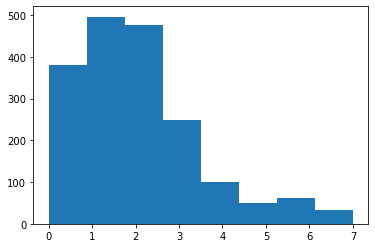

In [33]:
scale_mapper = {"0-49,999":0, "50,000-99,999":1, "100,000-149,999":2, "150,000-199,999":3, "200,000-249,999":4, "250,000-299,999":5, "300,000-499,999":6, "500K +": 7}
cdf["target"] = data["Q25"].replace(scale_mapper)

from collections import Counter

cdf["target"].value_counts()

plt.hist(cdf["target"], bins = 8)
plt.plot()



### Train/Test Split and Data Balancing 

Here we can see that the majority of survey takers fall within the first three categories of salary ranges which go from 0 - 149,999 USD/year. However, since the dataset is imbalanced, I have incorportated a balancing technique called SMOTE. 

In [34]:
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split


X = cdf.iloc[:,:-1]
y = cdf.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle = True)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))


print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res == 3)))
print("After OverSampling, counts of label '4': {}".format(sum(y_train_res == 4)))

print("After OverSampling, counts of label '5': {}".format(sum(y_train_res == 5)))
print("After OverSampling, counts of label '6': {}".format(sum(y_train_res == 6)))
print("After OverSampling, counts of label '7': {}".format(sum(y_train_res == 7)))



After OverSampling, the shape of train_X: (3000, 61)
After OverSampling, the shape of train_y: (3000,) 

After OverSampling, counts of label '0': 375
After OverSampling, counts of label '1': 375
After OverSampling, counts of label '2': 375
After OverSampling, counts of label '3': 375
After OverSampling, counts of label '4': 375
After OverSampling, counts of label '5': 375
After OverSampling, counts of label '6': 375
After OverSampling, counts of label '7': 375


# Modeling

Here the model with the highest accuracy will be chosen then hyperparameter tuning will be conduced in addition to variable selection. 

### Logistic Regression 

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

import warnings  


logreg = LogisticRegression().fit(X_train, y_train)

y_pred=logreg.predict(X_test)

print(accuracy_score(y_test, y_pred))

scores = cross_val_score(logreg, X_train, y_train, cv = 10, scoring='accuracy')

print(scores.mean())


0.3852813852813853


/Users/mariamammar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mariamammar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

0.3955114169533938


/Users/mariamammar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mariamammar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

### KNN 

In [36]:
from sklearn.neighbors import KNeighborsClassifier


neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

y_pred = neigh.predict(X_test)

scores = cross_val_score(neigh, X_train, y_train, cv = 10, scoring='accuracy')


print(accuracy_score(y_pred, y_test))

print(scores.mean())

0.3268398268398268
0.33191533729538103


### Kernal SVM

In [37]:
from sklearn import svm

svm = svm.SVC(kernel='rbf').fit(X_train, y_train)

svm_pred = svm.predict(X_test)

print(accuracy_score(y_pred, y_test))


scores = cross_val_score(svm, X_train, y_train, cv = 10, scoring='accuracy')

print(scores.mean())

0.3268398268398268
0.41216244395787716


### Naive Bayes Classifier  

In [38]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print(accuracy_score(y_pred, y_test) )

scores = cross_val_score(nb, X_train, y_train, cv = 10, scoring='accuracy')

print(scores.mean())

0.3722943722943723
0.3796006672922531


### Randomforest 

0.3528138528138528
0.3860650609946825


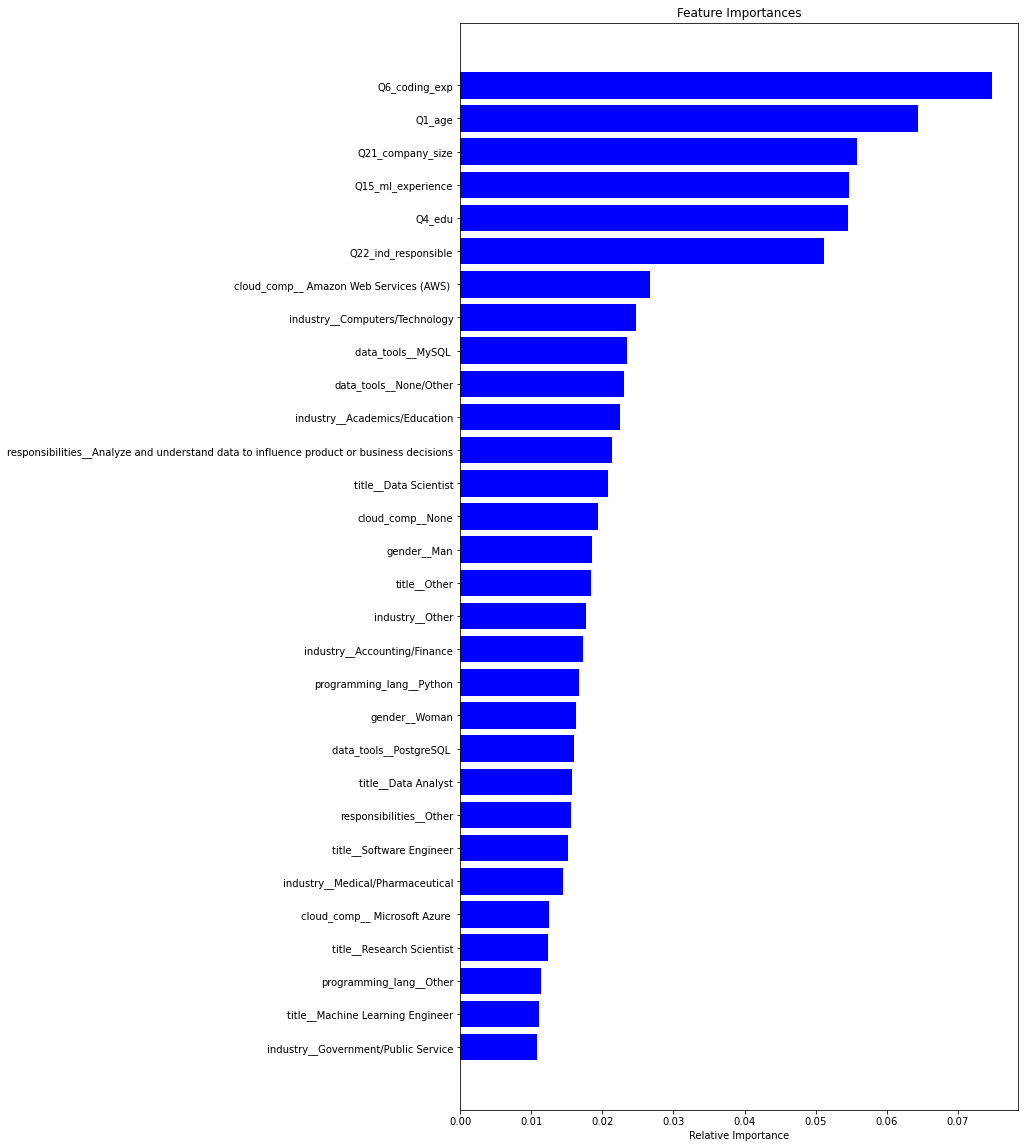

In [39]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)


RFC_pred = RFC.predict(X_test)

print(accuracy_score(RFC_pred, y_test))

scores = cross_val_score(RFC, X_train, y_train, cv = 10, scoring='accuracy')

print(scores.mean())


features = X.columns
importances = RFC.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 30 

plt.figure(figsize=(10,20))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()


### AdaBoost 

In [40]:
from sklearn.ensemble import AdaBoostClassifier


ada = AdaBoostClassifier()
ada.fit(X_train, y_train)


ada_pred = ada.predict(X_test)

print(accuracy_score(ada_pred, y_test))

scores = cross_val_score(ada, X_train, y_train, cv = 10, scoring='accuracy')

print(scores.mean())

0.3203463203463203
0.32676988843707644


### Hyperparameter tuning and variable selection

From all the previous model runs, the Kernal SVM model achieved the highest accuracy. However, feature importance of linear SVMs can be found out but not for a nonlinear SVMs, the reason being that, when the SVM is non-linear the dataset is mapped into a space of higher dimension, which is quite different from the parent dataset and the hyperplane is obtained and this high dimensional data and hence the property is changed from that of the parent dataset and hence it is not possible to find the feature importance of this SVM in relation to the parent dataset features. 

The second highest scoring model in terms of accuracy was the Logistic Regression model. However, the stats module in Python for logistic regression only creates output for binary classification problems. Due to these reasons and the fact that accuracy for the Random Forest model does not show significant deviation (less than 2%), this model was chosen for ease of explainability to move foreward with the hyperparamters tuning and variable selection. 

#### Hyperparameter Tuning 

In [41]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)



Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/mariamammar/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/mariamammar/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [42]:
best_rf = rf_random.best_params_
rf_pred = rf_random.predict(X_test)

accuracy_score(rf_pred, y_test)

0.39826839826839827

In [43]:
best_rf

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [44]:
scores = cross_val_score(rf_random, X_train, y_train, cv = 10, scoring='accuracy')

print(scores.mean())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/mariamammar/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/mariamammar/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/mariamammar/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/mariamammar/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/mariamammar/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/mariamammar/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/mariamammar/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/mariamammar/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/mariamammar/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/mariamammar/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/mariamammar/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/mariamammar/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/mariamammar/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/mariamammar/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/mariamammar/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.43091439891565003


Unfortunatley, this the random search CV did little to change the accuracy metric.  

In [45]:
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

grid_pred = grid_search.predict(X_test)

accuracy_score(grid_pred, y_test)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


0.3917748917748918

#### Re-training Model with Most Important Features

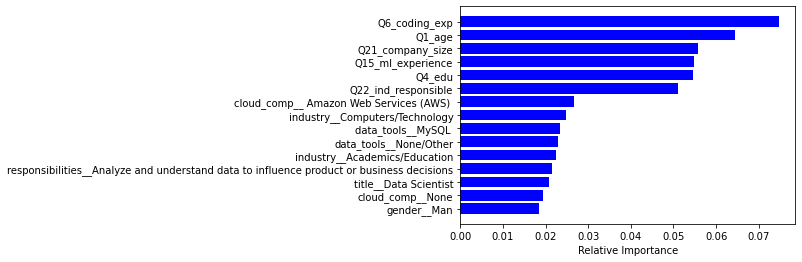

In [46]:
from sklearn.feature_selection import RFECV
#SelectFromModel will select those features which importance is greater than 
#the mean importance of all the features by default
num_features = 15
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()


Since years of coding experience, age, education, years of machine learning experience, and company size seem to be the more important factors, we new model will be built using only those features. 

In [47]:
cdf.columns

Index(['Q1_age', 'gender__Man', 'gender__Other', 'gender__Woman', 'Q4_edu',
       'title__Business Analyst', 'title__DBA/Database Engineer',
       'title__Data Analyst', 'title__Data Engineer', 'title__Data Scientist',
       'title__Machine Learning Engineer', 'title__Other',
       'title__Product Manager', 'title__Program/Project Manager',
       'title__Research Scientist', 'title__Software Engineer',
       'title__Statistician', 'Q6_coding_exp', 'programming_lang__Other',
       'programming_lang__Python', 'programming_lang__R',
       'programming_lang__SQL', 'Q15_ml_experience',
       'industry__Academics/Education', 'industry__Accounting/Finance',
       'industry__Broadcasting/Communications',
       'industry__Computers/Technology', 'industry__Energy/Mining',
       'industry__Government/Public Service',
       'industry__Insurance/Risk Assessment',
       'industry__Manufacturing/Fabrication', 'industry__Marketing/CRM',
       'industry__Medical/Pharmaceutical',
       '

In [48]:
new_df = cdf[["Q1_age","Q4_edu","Q15_ml_experience","Q6_coding_exp","Q21_company_size","Q22_ind_responsible","target"]]

X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle = True)

rf_new = RandomForestClassifier()

rf_new.fit(X_train, y_train)

rr_new_pred = rf_new.predict(X_test)

accuracy_score(y_test, rr_new_pred)

0.33875338753387535

## Conclusion

This score is was not significantly higher than the previous model which included all of the initial features. None of the models were able to achieve an accuracy significantly higher than 40%. This suggests that the model is significantly underfit or that there is not one feature or a set of features that can clearly expalin the variation in salaries.

For further research, data from a similar survey that features a continuous target variable with exact salary amounts. One should also note any noise that may result from self-input answers from survey takers. 
